In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = dataset[['Level']]
X.shape

(10, 1)

In [4]:
y = dataset['Salary']
y.shape

(10,)

In [5]:
class PolyRegression():
    """
    Polynomial Linear Regression.
    (only for single featured X.  i.e., X.shape = (n,1))

    Parameters
    ----------
    fit_intercept : boolean, optional, default True
        whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (e.g. data is expected to be already centered).

    copy_X : boolean, optional, default True
        If True, X will be copied; else, it may be overwritten.
    
    order : scaler, optional, default 2
        The order of polynomial.

    Attributes
    ----------
    coef_ : array, shape (n_features, ) or (n_targets, n_features)
        Estimated coefficients for the linear regression problem.
        If multiple targets are passed during the fit (y 2D), this
        is a 2D array of shape (n_targets, n_features), while if only
        one target is passed, this is a 1D array of length n_features.

    intercept_ : array
        Independent term in the linear model.

    """

    def __init__(self, fit_intercept=True, copy_X=True, order=2):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self.order = order
    
    
    
    def _polyGen(self, X):
        _a, _b = X.shape
        _z=[]

        for _i in range(_a):
            for _j in range(_b):
                _z.append([])

        _z = np.array(_z)

        for _i in range(2, self.order+1, 1):
            _z = np.concatenate((_z, X**_i), axis=1)

        X = np.concatenate((X, _z), axis=1)
        return X
    
    
    
    def fit(self, x, y):
        """
        Fit linear model.

        Parameters
        ----------
        X : array-like or sparse matrix, shape (n_samples, n_features)
            Training data

        y : array_like, shape (n_samples, n_targets)
            Target values.

        Returns
        -------
        self : returns an instance of self.
        """
        if self.copy_X:
            X = x.copy()
        else:
            X = x
        
        X = self._polyGen(X)
        
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        
        if self.fit_intercept:
            self.intercept_ = np.mean(y) - np.dot(np.mean(X, axis=0), self.coef_)
        else:
            self.intercept_ = 0
        
        return self
        
        
        
    def predict(self, X):
        """
        Predict using the linear model

        Parameters
        ----------
        X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
        
        Returns
        -------
        C : array, shape (n_samples,)
        Returns predicted values.
        """
        X = self._polyGen(X)
        return np.dot(X, self.coef_) + self.intercept_ 

In [6]:
model = PolyRegression(order=4)

In [7]:
model.fit(X, y)

In [8]:
y_pred = model.predict(X)
y_pred

array([ 12868.09373821,  47505.45383371,  81417.00030259, 103349.15212028,
       114976.85012202, 130903.55700289, 178661.25731777, 298710.4574814 ,
       544440.1857683 , 982167.99231283])

In [9]:
model.intercept_

1687.0229004772846

In [10]:
model.coef_

array([-11839.90521757,  29744.76859017,  -7262.48094569,    538.68841083])

In [11]:
from sklearn import metrics

In [12]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y, y_pred)

In [13]:
err = pd.DataFrame([mae, mse, rmse, r2], ['mean absolute error', 'mean squared error', 'root mean squared error', 'r^2 score'], ['errors'])
err

,errors
mean absolute error,1.883664e+04
mean squared error,5.181912e+08
root mean squared error,2.276381e+04
r^2 score,9.935758e-01


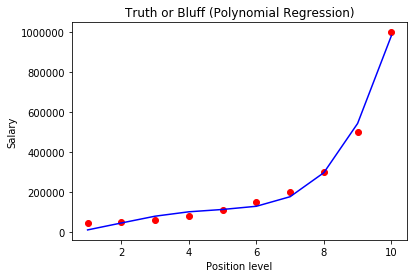

In [14]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()